<a href="https://colab.research.google.com/github/BABALEXA/Laboratorny/blob/main/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Covid Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115223,1,4,1,1,9999-99-99,97,2,42,2,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
115224,2,4,1,1,9999-99-99,97,2,39,2,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
115225,1,4,2,1,9999-99-99,97,2,37,97,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
115226,2,4,2,1,9999-99-99,97,2,26,97,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0


In [3]:
def create_holes(dataframe, column_name, hole_percentage = 60):


    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes


In [5]:
dfh = create_holes(df, 'age')
dfh

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,age
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2.0,2.0,3.0,97.0,NaN
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1.0,2.0,5.0,97.0,NaN
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2.0,2.0,3.0,2.0,NaN
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2.0,2.0,7.0,97.0,NaN
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2.0,2.0,3.0,97.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115223,1,4,1,1,9999-99-99,97,2,42,2,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN
115224,2,4,1,1,9999-99-99,97,2,39,2,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN
115225,1,4,2,1,9999-99-99,97,2,37,97,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN
115226,2,4,2,1,9999-99-99,97,2,26,97,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN


In [6]:
#Удаление
dfh_cleaned = dfh.dropna()


dfh_cleaned

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,age


In [7]:

#Заполнение при помощи медианы
dfh_filled_median = dfh.fillna(dfh.median())

dfh_filled_median

<ipython-input-7-14bcdda2ed65>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfh_filled_median = dfh.fillna(dfh.median())


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,age
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2.0,2.0,3.0,97.0,NaN
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1.0,2.0,5.0,97.0,NaN
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2.0,2.0,3.0,2.0,NaN
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2.0,2.0,7.0,97.0,NaN
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2.0,2.0,3.0,97.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115223,1,4,1,1,9999-99-99,97,2,42,2,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN
115224,2,4,1,1,9999-99-99,97,2,39,2,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN
115225,1,4,2,1,9999-99-99,97,2,37,97,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN
115226,2,4,2,1,9999-99-99,97,2,26,97,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN


In [8]:
dfh_filled_mean = dfh.fillna(dfh.mean())

dfh_filled_mean

<ipython-input-8-90b6c4a6b2a0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfh_filled_mean = dfh.fillna(dfh.mean())


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,age
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2.000000,2.000000,3.000000,97.000000,NaN
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1.000000,2.000000,5.000000,97.000000,NaN
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2.000000,2.000000,3.000000,2.000000,NaN
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2.000000,2.000000,7.000000,97.000000,NaN
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2.000000,2.000000,3.000000,97.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115223,1,4,1,1,9999-99-99,97,2,42,2,2,...,2,2,2,2,2,2.000000,2.000000,3.000000,97.000000,NaN
115224,2,4,1,1,9999-99-99,97,2,39,2,2,...,2,2,2,2,2,2.000000,2.000000,3.000000,97.000000,NaN
115225,1,4,2,1,9999-99-99,97,2,37,97,2,...,2,2,2,2,2,2.000000,2.000000,3.000000,97.000000,NaN
115226,2,4,2,1,9999-99-99,97,2,26,97,2,...,2,2,2,2,2,2.000000,2.000000,3.000000,97.000000,NaN


In [9]:
df_filled_mode = df.fillna(df["AGE"].mode()[0])

df_filled_mode

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115223,1,4,1,1,9999-99-99,97,2,42,2,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
115224,2,4,1,1,9999-99-99,97,2,39,2,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
115225,1,4,2,1,9999-99-99,97,2,37,97,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
115226,2,4,2,1,9999-99-99,97,2,26,97,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0


In [10]:
#Заполнение при помощи интерполяции
dfh_interpolated = dfh.interpolate()

dfh_interpolated

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,age
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2.0,2.0,3.0,97.0,NaN
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1.0,2.0,5.0,97.0,NaN
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2.0,2.0,3.0,2.0,NaN
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2.0,2.0,7.0,97.0,NaN
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2.0,2.0,3.0,97.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115223,1,4,1,1,9999-99-99,97,2,42,2,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN
115224,2,4,1,1,9999-99-99,97,2,39,2,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN
115225,1,4,2,1,9999-99-99,97,2,37,97,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN
115226,2,4,2,1,9999-99-99,97,2,26,97,2,...,2,2,2,2,2,2.0,2.0,3.0,97.0,NaN


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [20]:
#При помощи межквартильного размаха
Q1 =  df["AGE"].quantile(0.25)
Q3 = df["AGE"].quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[(df["AGE"] > (Q1-1.5*IQR )) & (df["AGE"] < (Q3+1.5*IQR))]
df_IQR["AGE"].describe()

count    115213.000000
mean         49.653615
std          17.271294
min           0.000000
25%          37.000000
50%          49.000000
75%          62.000000
max          99.000000
Name: AGE, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ed494c35510>,
 'caps': [<matplotlib.lines.Line2D at 0x7ed494c35a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ed494c35270>],
 'medians': [<matplotlib.lines.Line2D at 0x7ed494c35f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ed494c36230>],
 'means': []}

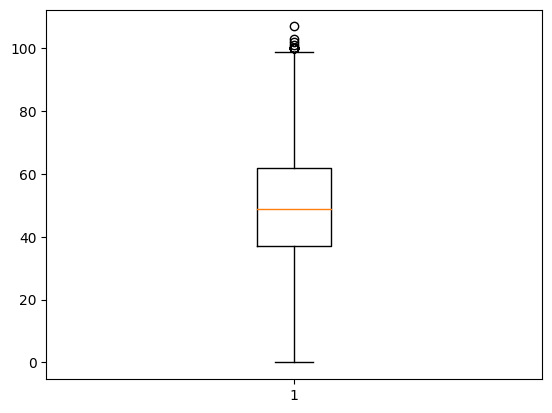

In [39]:
plt.boxplot(df["AGE"])


In [58]:
#Методом среднего
mean = df["AGE"].mean()
stdd = df["AGE"].std()
limit = 3 * stdd

emissions = [x for x in df["AGE"] if abs(x - mean) > limit]
emissions


[103, 107, 102]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ed493f16830>,
 'caps': [<matplotlib.lines.Line2D at 0x7ed493f16d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ed493f16590>],
 'medians': [<matplotlib.lines.Line2D at 0x7ed493f172b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ed493f17550>],
 'means': []}

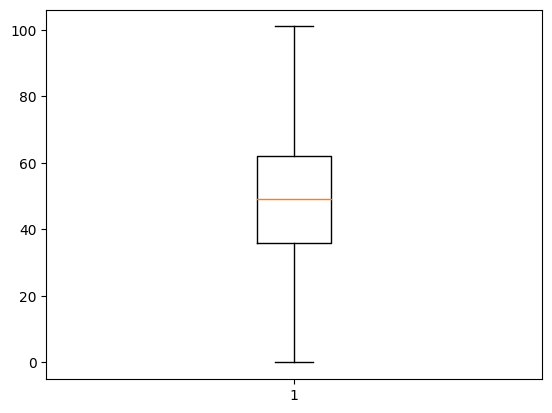

In [61]:
#Статистика и объяснение
df1 = df.query("AGE not in [103, 107, 102, 96]")
plt.boxplot(df1["AGE"])

**Объяснения** Изаначальный боксплот показал выбросы, я их выявил и удалил затем построил новый боксплот без выбросов

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [53]:
#Проверка на дубли
duplicate_check = df[df.duplicated()]
duplicate_check

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
62,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2.0,2.0,7.0,2.0
63,2,1,2,1,9999-99-99,97,2,33,97,2,...,2,2,2,2,2,2,2.0,2.0,7.0,97.0
75,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2.0,2.0,7.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115222,1,4,1,1,9999-99-99,97,2,23,2,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
115223,1,4,1,1,9999-99-99,97,2,42,2,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
115224,2,4,1,1,9999-99-99,97,2,39,2,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0
115225,1,4,2,1,9999-99-99,97,2,37,97,2,...,2,2,2,2,2,2,2.0,2.0,3.0,97.0


In [52]:
#Удаление дублей
df_without_duplicates = df.drop_duplicates()
df_without_duplicates

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115200,2,4,2,2,9999-99-99,2,2,53,97,2,...,2,2,1,2,1,2,1.0,2.0,3.0,2.0
115208,1,4,1,1,9999-99-99,97,1,47,2,1,...,2,2,2,2,2,1,2.0,2.0,3.0,97.0
115215,2,4,1,2,9999-99-99,2,2,66,2,2,...,1,2,1,2,2,2,2.0,2.0,3.0,2.0
115217,1,4,2,2,9999-99-99,2,2,65,97,1,...,2,2,1,1,2,2,2.0,2.0,3.0,2.0


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [74]:
# MinMaxScaler
scaler = MinMaxScaler()
df_scaler = df.copy()
df_scaler[num_features] = scaler.fit_transform(df[num_features])
df_scaler.AGE.unique()

array([0.60747664, 0.6728972 , 0.51401869, 0.4953271 , 0.63551402,
       0.37383178, 0.59813084, 0.34579439, 0.23364486, 0.35514019,
       0.22429907, 0.28037383, 0.44859813, 0.21495327, 0.74766355,
       0.57009346, 0.5046729 , 0.55140187, 0.42056075, 0.24299065,
       0.29906542, 0.45794393, 0.36448598, 0.25233645, 0.53271028,
       0.18691589, 0.52336449, 0.43925234, 0.46728972, 0.42990654,
       0.40186916, 0.26168224, 0.30841121, 0.14953271, 0.57943925,
       0.54205607, 0.3364486 , 0.41121495, 0.61682243, 0.48598131,
       0.47663551, 0.3271028 , 0.17757009, 0.8411215 , 0.31775701,
       0.20560748, 0.27102804, 0.13084112, 0.28971963, 0.39252336,
       0.14018692, 0.00934579, 0.        , 0.1588785 , 0.38317757,
       0.01869159, 0.09345794, 0.11214953, 0.12149533, 0.03738318,
       0.06542056, 0.05607477, 0.07476636, 0.56074766, 0.04672897,
       0.58878505, 0.70093458, 0.75700935, 0.62616822, 0.1682243 ,
       0.65420561, 0.82242991, 0.79439252, 0.85981308, 0.68224

Масштабируйте категориальные признаки через OneHotEncoder

In [81]:

from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
df = df.astype({'SEX': 'category',
                'PNEUMONIA': 'category',
                'DIABETES': 'category',
                'ASTHMA': 'category',
                })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115228 entries, 0 to 115227
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   USMER                 115228 non-null  int64   
 1   MEDICAL_UNIT          115228 non-null  int64   
 2   SEX                   115228 non-null  category
 3   PATIENT_TYPE          115228 non-null  int64   
 4   DATE_DIED             115228 non-null  object  
 5   INTUBED               115228 non-null  int64   
 6   PNEUMONIA             115228 non-null  category
 7   AGE                   115228 non-null  int64   
 8   PREGNANT              115228 non-null  int64   
 9   DIABETES              115228 non-null  category
 10  COPD                  115228 non-null  int64   
 11  ASTHMA                115228 non-null  category
 12  INMSUPR               115228 non-null  int64   
 13  HIPERTENSION          115228 non-null  int64   
 14  OTHER_DISEASE         115228 non-nul

In [82]:
cat_features = df.select_dtypes(include=['category']).columns
encoder = OneHotEncoder()
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[cat_features])


encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['SEX_1', 'SEX_2', 'PNEUMONIA_1', 'PNEUMONIA_2', 'PNEUMONIA_99',
       'DIABETES_1', 'DIABETES_2', 'DIABETES_98', 'ASTHMA_1', 'ASTHMA_2',
       'ASTHMA_98'], dtype=object)

##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])